<a href="https://colab.research.google.com/github/ULabanieh/Utrecht-Housing-Data-Science-Project/blob/main/cla_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utrecht Housing Price Predictor

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The goal of the project is to explore how well housing prices can be predicted based on property characteristics and to build a clear end-to-end machine learning pipeline, from data exploration and preprocessing to model training and evaluation.

In [ ]:
# Install libraries and dependancies for project
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn
!pip install torch

In [6]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import torch

In [7]:
# fix for scientific notation
pd.set_option("display.float_format", "{:,.0f}".format)

In [8]:
# setting random seeds for reproducibility
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [9]:
# establishing working directory
import os
os.chdir("/content/drive/MyDrive/Final Project/data")


Importing dataset from csv

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/data/utrechthousinghuge.csv')
df

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11,5,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,14,5,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,17,7,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,19,6,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,20,6,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,993057,3525,12,8,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,993131,3500,16,8,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,993444,3525,12,6,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,993873,3525,14,8,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [11]:
df.shape

(2000, 16)

In [12]:
df.head()

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,100426,3528,11,5,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,100871,3528,14,5,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,100936,3800,17,7,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,100970,3800,19,6,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,101191,3800,20,6,118,108,46,1,2962,5266,1950,1,526000,610000,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2000 non-null   int64  
 1   zipcode      2000 non-null   int64  
 2   lot-len      2000 non-null   float64
 3   lot-width    2000 non-null   float64
 4   lot-area     2000 non-null   float64
 5   house-area   2000 non-null   float64
 6   garden-size  2000 non-null   float64
 7   balcony      2000 non-null   int64  
 8   x-coor       2000 non-null   int64  
 9   y-coor       2000 non-null   int64  
 10  buildyear    2000 non-null   int64  
 11  bathrooms    2000 non-null   int64  
 12  taxvalue     2000 non-null   int64  
 13  retailvalue  2000 non-null   int64  
 14  energy-eff   2000 non-null   int64  
 15  monument     2000 non-null   int64  
dtypes: float64(5), int64(11)
memory usage: 250.1 KB


In [14]:
# duplicate check
df.nunique()

,0
id,1999
zipcode,4
lot-len,60
lot-width,61
lot-area,870
house-area,157
garden-size,652
balcony,3
x-coor,396
y-coor,398


In [15]:
print(df.duplicated().sum())

0


In [16]:
print(df['id'].duplicated().sum())

1


In [17]:
df[df['id'].duplicated(keep = False)]

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
947,531909,3800,15,9,137,202,47,2,2517,5467,1965,1,919000,1142000,0,1
948,531909,3800,15,8,122,109,49,2,2505,5462,1969,1,535000,693000,0,0


In [18]:
df[df.duplicated()]
# no duplicate records in this dataset

,id,zipcode,lot-len,lot-width,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument


In [19]:
df.columns

Index(['id', 'zipcode', 'lot-len', 'lot-width', 'lot-area', 'house-area',
       'garden-size', 'balcony', 'x-coor', 'y-coor', 'buildyear', 'bathrooms',
       'taxvalue', 'retailvalue', 'energy-eff', 'monument'],
      dtype='object')

In [20]:
df['garden-size'].unique()

array([ 10.5,   8. ,  44.2,  39.6,  45.6,  48.4,  68.3,  85.5,   9.3,
        68.5,  89. ,  32.4,  83.3,   6.6,  11.9,  17.4,  48.9,   8.9,
        60.7,  55.6,  51. ,  20.3,  29.7,   5.1,  21. ,  70. ,  15.8,
        56.1,  44.7,  10.1,  14.6,  29.1,  77. ,  24.7,  43.4,   8.5,
        65.5,  14.3,  75.8,  20.2,   5.7,  30.4,  46.4,  26.2,  79.2,
         9.2,  96.6,  41.4,  17.8,  40.8,  38.9,   6.2,   9.1,   7.5,
        82.1,   8.8,  10.6,  12.4,  19.2,  23.1,  20. ,  83.4,  30.6,
         7.7,  20.5,  11.1,  50.9,   5.6,  27. ,  64.3,  35.2,  31.8,
        44.8,   8.7,  99.6,  10.3,  73.6,  64. ,  29. ,  57.5,  67.7,
        69.8,  25.5,  47.1,  45.4,  36.5,   7. ,  24. ,  23.4,  23. ,
        53. ,   5.2,  24.3,  15.9,  29.2,  47.8,  60.8,  73. ,  44. ,
        79.8,  35.3,  27.5,   8.3, 108.1,  42.7,  25.7,  63.7,  19.5,
        28.1,  42.6,  34.8,  37.8,  41.8,   6.7,   6.4,  51.9,  13.1,
        74.4,   9. ,  46. ,  59.2,  45.5,   6.9,  23.8,  21.6,  39.8,
        12.8,  68. ,

In [21]:
df = df.drop(['id', 'zipcode', 'lot-len', 'lot-width'], axis = 1)
df

,lot-area,house-area,garden-size,balcony,x-coor,y-coor,buildyear,bathrooms,taxvalue,retailvalue,energy-eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [22]:
df = df.rename(columns={ 'lot-area': 'lot_area', 'house-area': 'house_area', 'garden-side': 'garden_size', 'x-coor': 'x_coor', 'y-coor': 'y_coor', 'energy-eff': 'energy_eff', 'garden-size': 'garden_size', 'buildyear': 'build_year', 'taxvalue': 'tax_value', 'retailvalue': 'retail_value' })

In [23]:
df

,lot_area,house_area,garden_size,balcony,x_coor,y_coor,build_year,bathrooms,tax_value,retail_value,energy_eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [24]:
df.nunique()

,0
lot_area,870
house_area,157
garden_size,652
balcony,3
x_coor,396
y_coor,398
build_year,99
bathrooms,2
tax_value,682
retail_value,739


In [25]:
# verifying binary columns are truly binary
df["energy_eff"].unique()


array([0, 1])

In [26]:
df["monument"].unique()


array([1, 0])

In [27]:
# covert tax_value and retail_value features to int
df["retail_value"].head()


,retail_value
0,670000
1,675000
2,869000
3,628000
4,610000


In [28]:
df["tax_value"] = df["tax_value"].round(0).astype(int)
df["retail_value"] = df["retail_value"].round(0).astype(int)
df

,lot_area,house_area,garden_size,balcony,x_coor,y_coor,build_year,bathrooms,tax_value,retail_value,energy_eff,monument
0,56,112,10,2,2112,5113,1932,1,494000,670000,0,1
1,68,112,8,0,2355,5218,1945,1,504000,675000,0,1
2,111,151,44,2,2656,5200,1946,1,692000,869000,0,1
3,112,108,40,2,2856,5201,1946,1,521000,628000,0,1
4,118,108,46,1,2962,5266,1950,1,526000,610000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,99,142,20,2,2252,5752,1990,2,648000,765000,1,0
1996,124,135,34,2,2650,5768,1992,1,639000,728000,0,0
1997,78,146,20,2,2204,5854,2000,2,647000,733000,1,0
1998,103,137,27,1,2352,5958,2015,2,629000,694000,1,0


In [29]:
df[["tax_value", "retail_value"]].dtypes


,0
tax_value,int64
retail_value,int64


In [30]:
df[['lot_area', 'house_area', 'garden_size', 'build_year', 'tax_value', 'retail_value']].describe()

,lot_area,house_area,garden_size,build_year,tax_value,retail_value
count,"2,000","2,000","2,000","2,000","2,000","2,000"
mean,115,140,35,"1,969","651,715","791,024"
std,34,42,24,26,"182,927","210,980"
min,50,68,5,"1,920","310,000","419,000"
25%,89,111,14,"1,947","521,000","631,750"
50%,110,135,32,"1,969","633,000","766,000"
75%,138,166,53,"1,992","759,250","907,250"
max,216,248,116,"2,018","1,162,000","1,428,000"


In [31]:
df.skew()


,0
lot_area,1
house_area,1
garden_size,1
balcony,-0
x_coor,0
y_coor,-0
build_year,0
bathrooms,1
tax_value,1
retail_value,1


# Visualizations 1

In [32]:
# Style for nice-looking plots
sns.set_style("whitegrid")
%matplotlib inline


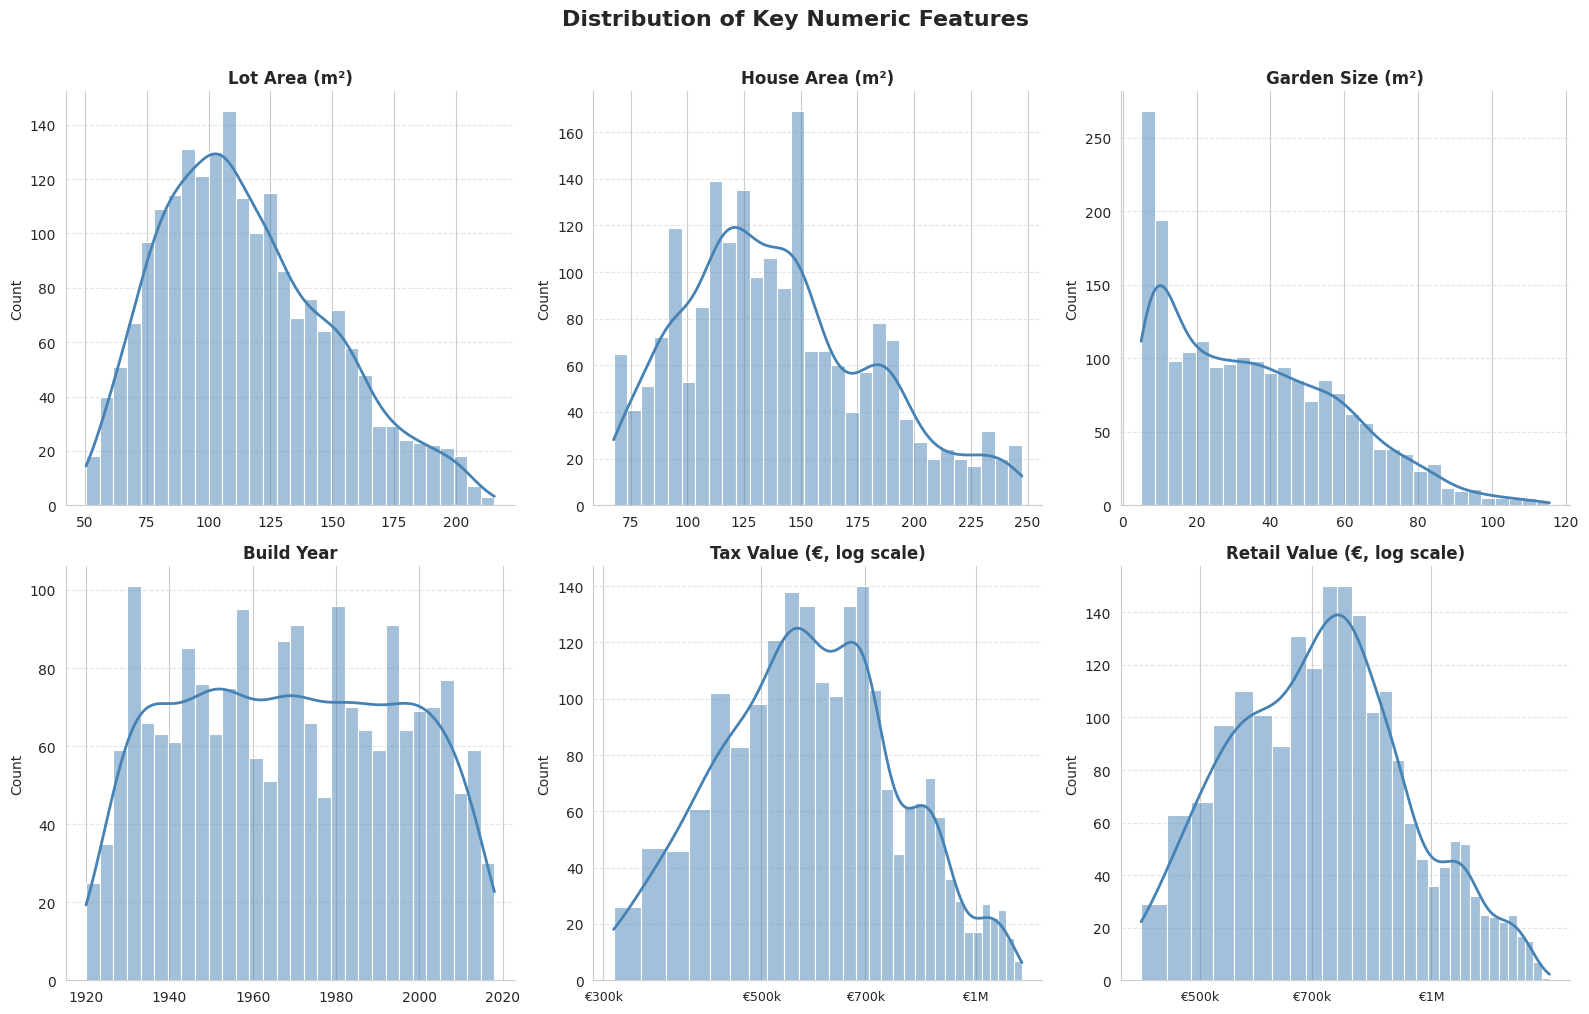

In [42]:
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€, log scale)",
    "retail_value": "Retail Value (€, log scale)"
}

log_cols = {"tax_value", "retail_value"}

bar_color = "steelblue"
kde_color = "tomato"

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color=bar_color,
                 line_kws={"color": kde_color, "linewidth": 2}, ax=ax)

    if col in log_cols:
        ax.set_xscale("log")

        tick_values = [300000, 500000, 700000, 1000000]
        tick_labels = ["€300k", "€500k", "€700k", "€1M"]

        ax.xaxis.set_major_locator(FixedLocator(tick_values))
        ax.xaxis.set_major_formatter(FixedFormatter(tick_labels))
        ax.xaxis.set_minor_locator(mticker.NullLocator())
        ax.tick_params(axis='x', labelsize=9)

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()

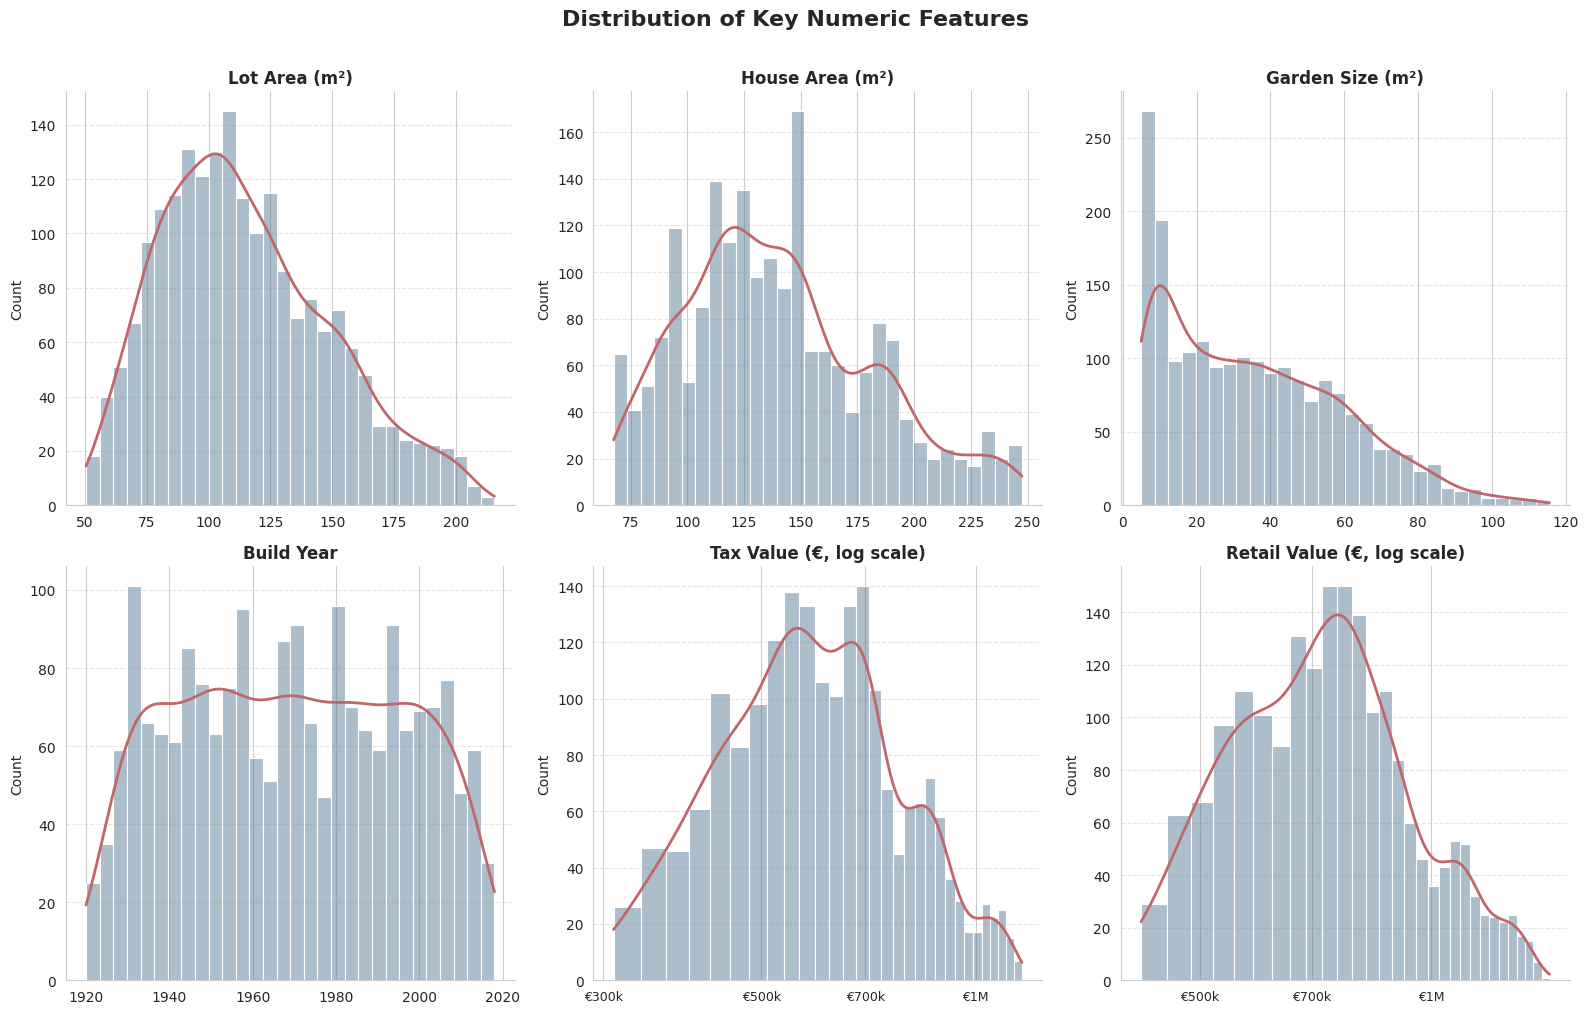

In [48]:
import matplotlib.ticker as mticker
from matplotlib.ticker import FixedLocator, FixedFormatter

numeric_cols = ["lot_area", "house_area", "garden_size", "build_year", "tax_value", "retail_value"]

col_labels = {
    "lot_area": "Lot Area (m²)",
    "house_area": "House Area (m²)",
    "garden_size": "Garden Size (m²)",
    "build_year": "Build Year",
    "tax_value": "Tax Value (€, log scale)",
    "retail_value": "Retail Value (€, log scale)"
}

log_cols = {"tax_value", "retail_value"}

bar_color = "#5B7C99"  # Slate blue
kde_color = "#C1666B"  # Muted crimson

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Distribution of Key Numeric Features", fontsize=16, fontweight="bold", y=1.01)

for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, color=bar_color, ax=ax)

    # Change KDE line color manually
    for line in ax.lines:
        line.set_color(kde_color)
        line.set_linewidth(2)

    if col in log_cols:
        ax.set_xscale("log")

        tick_values = [300000, 500000, 700000, 1000000]
        tick_labels = ["€300k", "€500k", "€700k", "€1M"]

        ax.xaxis.set_major_locator(FixedLocator(tick_values))
        ax.xaxis.set_major_formatter(FixedFormatter(tick_labels))
        ax.xaxis.set_minor_locator(mticker.NullLocator())
        ax.tick_params(axis='x', labelsize=9)

    ax.set_title(col_labels[col], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.5)
    ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()
plt.show()